<a href="https://colab.research.google.com/github/vasanth2809/ML-DL-NLP-LLM/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shrutimechlearn/churn-modelling")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/shrutimechlearn/churn-modelling/versions/1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## Divide the datset into independent and dependent features

x = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [ ]:
## Feature Engineering

geography = pd.get_dummies(x["Geography"], drop_first = True)
gender = pd.get_dummies(x['Gender'], drop_first = True)

In [ ]:
## concatenate these variabes with dataframe
x = x.drop(['Geography', 'Gender'], axis = 1)

In [ ]:
x = pd.concat([x, geography, gender], axis = 1)

In [ ]:
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
## Feature Scaling

from sklearn.preprocessing import StandardScaler # based on z-score it does this
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
model_history = classifier.fit(x_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8646 - loss: 0.3126 - val_accuracy: 0.8463 - val_loss: 0.3851
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8681 - loss: 0.3050 - val_accuracy: 0.8550 - val_loss: 0.4026
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8709 - loss: 0.3126 - val_accuracy: 0.8508 - val_loss: 0.3867
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8734 - loss: 0.3057 - val_accuracy: 0.8554 - val_loss: 0.3808
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8832 - loss: 0.2940 - val_accuracy: 0.8535 - val_loss: 0.4027
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8786 - loss: 0.3031 - val_accuracy: 0.8516 - val_loss: 0.4191
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8743 - loss: 0.2974 - val_accuracy: 0.8569 - val_loss: 0.4198
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8724 - loss: 0.3135 -

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

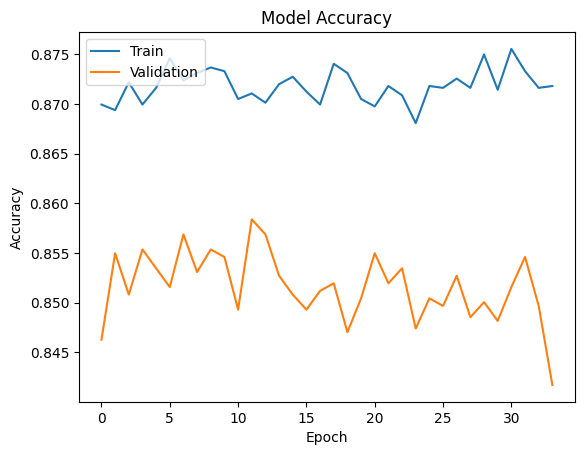

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Visualize Loss

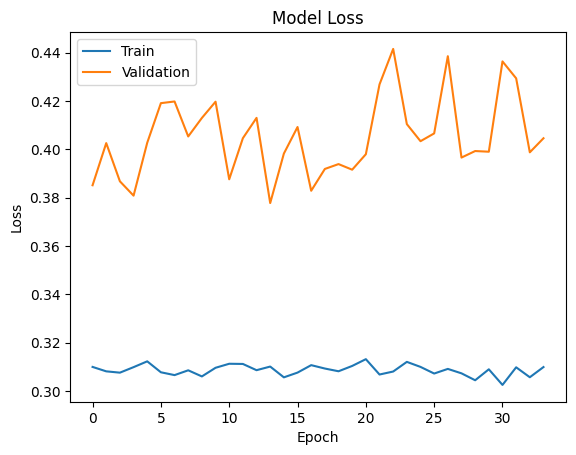

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Make Predictions and Evaluate the Model

In [ ]:
# Predicting the Test set results
y_pred = ann.predict(x_test)
y_pred = (y_pred >= 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[1513   82]
 [ 197  208]]


0.8605

In [ ]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1513,   82],
       [ 197,  208]])

In [ ]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.8605

In [ ]:
# get the weights
weights = classifier.get_weights()